![SPARK Banner](https://i.imgur.com/3vCmTns.png)

# SPARK | Day 4 | July 15th, 2021

The agenda for today:

1. Machine Learning 
2. Supervised Machine Learning (regression)

# Maching Learning

## What is machine learning?

Machine learning isn't really a well defined term. There are, however, two defintions that are well accepted


### Arthur Samuel (1959)
    Field of study that gives computers the ability to learn without being explicitly programmed

### Tom Michel (1999)
    A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E

Watch this quick [video](https://www.youtube.com/watch?v=f_uwKZIAeM0) about machine learning.

## Types of Machine Learning
There are two major branches or machine learning that you different types of learning alorithms.

### 1. Supervised learning
We teach a computer how to do something, then let is use its new found knowledge to do it.

- supervised learning requires **labelled** data
- e.g., regression, classification — you want to predict housing prices

### 2. Unsupervised learning
We let the computer learn how to learn to do somethings, and use its knowledge to getermine structure and patterns in the data.

- unsupervised learning requested **unlabelled** data
- e.g., clustering — you want to know if you can group the data into three groups


For SPARK, we will be learning about supervised machine learning. 


## Importing Machine Learning Libraries

There are some specialized libraries in python that we can use for machine learning.

### sklearn

[sklearn](https://scikit-learn.org/stable/) is a module of simple and efficient tools for machine learning problems like classification, regression and clustering. 

To import sklearn we use an import statement

```
    import sklearn
```

In particular, we want the `train_test_split` function, so we will import it this way

```
    from sklearn.model_selection import train_test_split
```

### statsmodels 

[statsmodels](https://www.statsmodels.org/stable/index.html) is a python module that provides class functions for many statistical models. Specifically, we are going to buse the [statsmodels.formula.api](https://www.statsmodels.org/stable/api.html?highlight=formula%20api#statsmodels-formula-api). This to long to type out, so we usually import and use the short for `smf`

To import statsmodels.formula.api we use and import statement

```
    import statsmodels.formula.api as smf 
```





In [ ]:
# Lets import sklearn, along with our other data science packages

import numpy as np # For math- and matrix-based functions
import pandas as pd # For DataFrame functionality
import seaborn as sns # For plotting/ data visualization
from sklearn.model_selection import train_test_split # For the train_test_split_function
import statsmodels.formula.api as smf # Stats models for 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Regression Analysis

Regression analysis attempts to explain the relationship between variables. We want to see if we can predict or explain the **dependent variable** using one or more **explanatory variables**. In linear regression, we assume that the dependent variable can be somewhat explained by a combination of expanatory variables.

A very simple example is one where the depedent variable is height and the explantatory variable is age. The age of a person does a good job of explaining their height for kids under 16. 

We can also think of **explanatory variables** as **features** in our linear model, and the **dependent variable** as the **target**.

The pipeline is as follows:

![image](https://i.imgur.com/tu0nVzO.png)

## Load Car Data

Lets load our data for car models

In [ ]:
# Import car data
cars = pd.read_csv("https://raw.githubusercontent.com/nguyenjenny/spark_shared_repo/main/datasets/Cars.csv")

# Drop missing data
cars = cars.dropna()

# Show DataFrame
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982,USA


## Predicting Fuel Efficiency of Cars

Let's see if can predict the fuel efficiency (in miles per gallon), using information about the car's number of horsepower, weight, and year. 

**Dependent/Target Variable** = `"Miles_per_Gallon"`

**Exploratory Variables/Features** = `["Horsepower",  "Weight_in_lbs", "Year"]`

### Lets plot the relationship between our target and each of our features using `sns.regplot()`

`sns.regplot()` plots the data as well as a linear regression fit. The syntax of this function is the same as all the other seaborn plots, but you can also take a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)

#### Horsepower vs. Miles_per_Gallon: negatively correlated

<AxesSubplot:xlabel='Horsepower', ylabel='Miles_per_Gallon'>

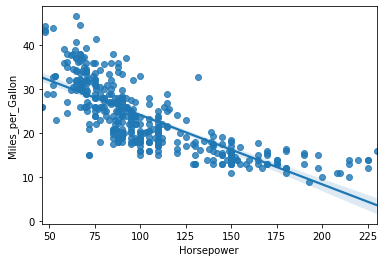

In [ ]:
sns.regplot(
    data = cars,
    x = "Horsepower",
    y = "Miles_per_Gallon"
    
)

#### Weight_in_lbs vs. Miles_per_Gallon: negatively correlated

<AxesSubplot:xlabel='Weight_in_lbs', ylabel='Miles_per_Gallon'>

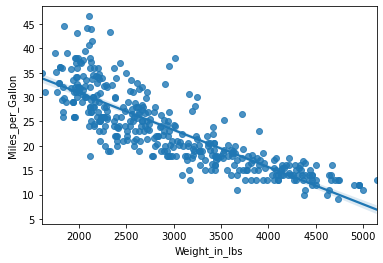

In [ ]:
sns.regplot(
    data = cars,
    x = "Weight_in_lbs",
    y = "Miles_per_Gallon"
    
)

#### Exercise 1: Plot Year vs. Miles_per_Gallon: Are they positvely or negatively correlated? Is year as good of a predictor as Horsepower and/or Weight?

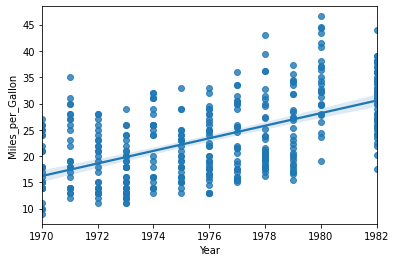

In [ ]:
# TO-DO: Plot a regplot of Year vs Miles_per_Gallon
sns.regplot(
    data = cars,
    x = "Year",
    y = "Miles_per_Gallon"
    
)

positively correlated
yes

## Splitting our data using `train_test_split()`

Whenever we do machine learning, we always want to reserve data to **train** the model as well as data to **test** the model.  By default, we usually use 75% (.75) of our data for training and 25% (.25) of our data for testing.  Testing our data allow us to see how good of a job our linear regression model does at predicting the target variable. 


We use `train_test_split()` to shuffle and randomly split our data into the train dataset and the test dataset.

Before we can use it, be sure to properly import it

```
    from sklearn.model_selection import train_test_split
```

The `train_test_split()` is formatted as follows:

```
    df_train, df_test = train_test_split(df[target], df[features], test_size=.25, train_size=.75, random_state=1)
```

- Where:
    - `df_train`: the split dataset for training
    - `df_test`: the split dataset for testing
    - `test_size`: the proportion of the data set to include in the testing set
    - `train_size`: the proportion of the data set to include in the training set
    - `random_state`: controls the shuffling of the data, using an int allows for reproducible output 

In [ ]:
# Split the the car data into testing and training sets
cars_train, cars_test = train_test_split(cars, test_size=.25, train_size=.75, random_state=1)

In [ ]:
# The train dataset has 304 rows (notice how the indexes are randomly suffled)
cars_train

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
266,mercury zephyr,20.8,6,200.0,85.0,3070,16.7,1978,USA
296,buick estate wagon (sw),16.9,8,350.0,155.0,4360,14.9,1979,USA
115,toyota carina,20.0,4,97.0,88.0,2279,19.0,1973,Japan
213,ford pinto,26.5,4,140.0,72.0,2565,13.6,1976,USA
106,amc hornet,18.0,6,232.0,100.0,2945,16.0,1973,USA
...,...,...,...,...,...,...,...,...,...
212,toyota corolla,28.0,4,97.0,75.0,2155,16.4,1976,Japan
264,amc concord,19.4,6,232.0,90.0,3210,17.2,1978,USA
80,chevrolet chevelle concours (sw),13.0,8,307.0,130.0,4098,14.0,1972,USA
244,chevrolet chevette,30.5,4,98.0,63.0,2051,17.0,1977,USA


In [ ]:
# The test dataset has 102 rows (notice how the indexes are randomly suffled)
cars_test

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
89,toyouta corona mark ii (sw),23.0,4,120.0,97.0,2506,14.5,1972,Japan
174,toyota corolla,29.0,4,97.0,75.0,2171,16.0,1975,Japan
363,toyota corolla,32.4,4,108.0,75.0,2350,16.8,1982,Japan
127,volvo 144ea,19.0,4,121.0,112.0,2868,15.5,1973,Europe
393,datsun 310 gx,38.0,4,91.0,67.0,1995,16.2,1982,Japan
...,...,...,...,...,...,...,...,...,...
33,dodge d200,11.0,8,318.0,210.0,4382,13.5,1970,USA
97,mercury marquis brougham,12.0,8,429.0,198.0,4952,11.5,1973,USA
314,oldsmobile omega brougham,26.8,6,173.0,115.0,2700,12.9,1979,USA
81,ford gran torino (sw),13.0,8,302.0,140.0,4294,16.0,1972,USA


## Creating and Training our Linear Regression Machine Learning Model using `smf.ols()`

`smf.ols()` is the function we use to create a linear regression model.  OLS stands for ordinary least square models. 


It requires the following syntax

```
    model = smf.ols(formula="target ~ feature_1 + feature_2 + feature_3 + ... + feature_n", data=df).fit()
```

- where:
    - `formula`: the formula of the model as string in the format of `"target ~ feature_1 + feature_2 + feature_3 + ... + feature_n"`
        - The target and features are separated by `~`
        - The features are seprated by `+`
    - `data`: the name of your DataFrame
    - `.fit()`: is a function that trains the model to fit the data


This is the syntax of  `.predict()`:

- If we pass nothing into the model, it will return the prediction based on what is was trained on: 
```
        model.predict()
```
- If we our pass our testing_data or other new data, it will return the prediction for the testing/new data|
```
        model.predict(df_test)
```


In [ ]:
# Lets create and train our model
cars_model = smf.ols(formula="Miles_per_Gallon ~ Horsepower + Weight_in_lbs + Year", data=cars_train).fit()

# Get prediciton from the linear model and make it a new colunn on the training DataFrame
cars_train['Miles_per_Gallon_Prediction'] = cars_model.predict()

# Get the difference between the predicted and observed/actual value
cars_train['Miles_per_Gallon_Difference'] = cars_train['Miles_per_Gallon_Prediction']-cars_train['Miles_per_Gallon']

# Show DataFrame
cars_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin,Miles_per_Gallon_Prediction,Miles_per_Gallon_Difference
266,mercury zephyr,20.8,6,200.0,85.0,3070,16.7,1978,USA,24.310205,3.510205
296,buick estate wagon (sw),16.9,8,350.0,155.0,4360,14.9,1979,USA,16.449468,-0.450532
115,toyota carina,20.0,4,97.0,88.0,2279,19.0,1973,Japan,25.538534,5.538534
213,ford pinto,26.5,4,140.0,72.0,2565,13.6,1976,USA,26.092171,-0.407829
106,amc hornet,18.0,6,232.0,100.0,2945,16.0,1973,USA,21.320496,3.320496
...,...,...,...,...,...,...,...,...,...,...,...
212,toyota corolla,28.0,4,97.0,75.0,2155,16.4,1976,Japan,28.596392,0.596392
264,amc concord,19.4,6,232.0,90.0,3210,17.2,1978,USA,23.401476,4.001476
80,chevrolet chevelle concours (sw),13.0,8,307.0,130.0,4098,14.0,1972,USA,13.210416,0.210416
244,chevrolet chevette,30.5,4,98.0,63.0,2051,17.0,1977,USA,30.070768,-0.429232


## Evaluating the Fit of the Model: Root Mean Squared Error (RMSE)

Root Mean Squared Error (RMSE) is used to assess how well a regression model first the dataset. It tells the average distance between the predicted values from the model and the actual/observed values. 

The formula for RMSE is as follows:

$$ 
RMSE =  \sqrt{\Sigma \frac{(P_{i} - O_{i})^2}{n}} 
$$

Where:
- $RMSE$ is root mean squared error
- $P$ is predicted value
- $O$ is observed/actual value
- $i$ is a single instance
- $n$ is the sample size


A lower RMSE indicates a better fitting model.
↓ RMSE = ↑ Fit

In [ ]:
# Get sample size (n)
n = len(cars_train)

# Calculate RMSE
rmse_train = np.sqrt((cars_train['Miles_per_Gallon_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the training data is {rmse_train}')

The RMSE of the training data is 3.3610554502727976


## Trying the model on the testing set

We need to test how our model performs on data it has never seen before. To do this we must again use `.predict()`

### Recall: 

This is the syntax of  `.predict()`:

- If we pass nothing into the model, it will return the prediction based on what is was trained on: 
```
        model.predict()
```
- If we our pass our testing_data or other new data, it will return the prediction for the testing/new data|
```
        model.predict(df_test)
```

In [ ]:
# Get prediciton from the linear model and make it a new colunn on the training DataFrame
cars_test['Miles_per_Gallon_Prediction'] = cars_model.predict(cars_test) # notice how we are passing the test data now, NOT train

# Get the difference between the predicted and observed/actual value
cars_test['Miles_per_Gallon_Difference'] = cars_test['Miles_per_Gallon_Prediction']- cars_test['Miles_per_Gallon']

# Show DataFrame
cars_test

<ipython-input-258-b5bc7c2b2bcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test['Miles_per_Gallon_Prediction'] = cars_model.predict(cars_test) # notice how we are passing the test data now, NOT train
<ipython-input-258-b5bc7c2b2bcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_test['Miles_per_Gallon_Difference'] = cars_test['Miles_per_Gallon_Prediction']- cars_test['Miles_per_Gallon']


,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin,Miles_per_Gallon_Prediction,Miles_per_Gallon_Difference
89,toyouta corona mark ii (sw),23.0,4,120.0,97.0,2506,14.5,1972,Japan,23.331586,0.331586
174,toyota corolla,29.0,4,97.0,75.0,2171,16.0,1975,Japan,27.772064,-1.227936
363,toyota corolla,32.4,4,108.0,75.0,2350,16.8,1982,Japan,31.746023,-0.653977
127,volvo 144ea,19.0,4,121.0,112.0,2868,15.5,1973,Europe,21.688994,2.688994
393,datsun 310 gx,38.0,4,91.0,67.0,1995,16.2,1982,Japan,34.008651,-3.991349
...,...,...,...,...,...,...,...,...,...,...,...
33,dodge d200,11.0,8,318.0,210.0,4382,13.5,1970,USA,9.294009,-1.705991
97,mercury marquis brougham,12.0,8,429.0,198.0,4952,11.5,1973,USA,8.058908,-3.941092
314,oldsmobile omega brougham,26.8,6,173.0,115.0,2700,12.9,1979,USA,27.052715,0.252715
81,ford gran torino (sw),13.0,8,302.0,140.0,4294,16.0,1972,USA,11.911489,-1.088511


In [ ]:
# Get sample size (n)
n = len(cars_test)

# Calculate RMSE
rmse_test = np.sqrt((cars_test['Miles_per_Gallon_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the testing data is {rmse_test}')

The RMSE of the testing data is 3.6027130386185715


### Exercise 2: The RMSE for the testing data is higher than the RMSE for the training data. Why do you think that is?

[double click to write your answer]

## Using the model to predict new scenerios. 

The RMSE values of the car model are actually pretty low. This gives us confidence in our model.  We can now use our model to predict what the fuel efficiency of an entirely new car might be like. 



### Create a new data frame of our predicted data

First we must create a DataFrame that has the the exact same column names (case-senstive) as our feature columns. We will be creating a DataFrame using the dictionary method. Please read the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas).
DataFrame.from_dict.html) for more details.

Lets say we want estimate the fuel efficiency (`"Miles_per_Gallon"`) of two different cars that we are thinking of buying. 

**Car 1**
- Horsepower of 67 hp
- Weight of 2700 lb
- Made in 1970

**Car 2**
- Horsepower of 90 hp
- Weight of 3500 lb
- Made in 2002





In [ ]:
# Create new_prediction DataFrame
new_prediction = pd.DataFrame({
    "Name": ["Car 1", "Car 2"],
    "Horsepower": [67, 90],
    "Weight_in_lbs": [2700, 3500],
    "Year": [1970, 2002],
})

# Show DataFrame
new_prediction

,Name,Horsepower,Weight_in_lbs,Year
0,Car 1,67,2700,1970
1,Car 2,90,3500,2002


In [ ]:
# Lets create and train our model
new_prediction["Fuel Efficiency"] = cars_model.predict(new_prediction)

# Show DataFrame
new_prediction

,Name,Horsepower,Weight_in_lbs,Year,Fuel Efficiency
0,Car 1,67,2700,1970,20.949962
1,Car 2,90,3500,2002,39.024765


We used the model 

### Exercise 3: Predict how much the fuel efficiency of these three cars?

**Car 1**
- Horsepower of 90 hp
- Weight of 1200 lb
- Made in 2006

**Car 2**
- Horsepower of 90 hp
- Weight of 3500 lb
- Made in 2002

**Car 3**
- Horsepower of 80 hp
- Weight of 2500 lb
- Made in 2040


In [ ]:
# TO-DO: Predict the fuel efficiency of the tree cars

# Create new_prediction DataFrame
new_prediction2 = pd.DataFrame({
    "Name": ["Car 1", "Car 2", "Car 3"],
    "Horsepower": [67, 90, 80],
    "Weight_in_lbs": [1200, 3500, 2500],
    "Year": [2006, 2002,2040],
})

# Show DataFrame
new_prediction2





,Name,Horsepower,Weight_in_lbs,Year
0,Car 1,67,1200,2006
1,Car 2,90,3500,2002
2,Car 3,80,2500,2040


In [ ]:
# Lets create and train our model
new_prediction2["Fuel Efficiency"] = cars_model.predict(new_prediction2)

# Show DataFrame
new_prediction2

,Name,Horsepower,Weight_in_lbs,Year,Fuel Efficiency
0,Car 1,67,1200,2006,56.329639
1,Car 2,90,3500,2002,39.024765
2,Car 3,80,2500,2040,72.858086


### Exercise 4: Create train and run a linear regression model on the dataset you selected

In [2]:
# Lets import sklearn, along with our other data science packages

import numpy as np # For math- and matrix-based functions
import pandas as pd # For DataFrame functionality
import seaborn as sns # For plotting/ data visualization
from sklearn.model_selection import train_test_split # For the train_test_split_function
import statsmodels.formula.api as smf # Stats models for 





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:


# Create a list of missing values and save as a variable
missing_values = ['n/a', 'na', 'NaN', 'NA', '--']

# Import dataset
characters = pd.read_csv("https://raw.githubusercontent.com/nguyenjenny/spark_shared_repo/main/datasets/characters.csv", na_values=missing_values)


# drop na rows

characters = characters.dropna(axis="rows",how="any")

characters= characters.drop(34,axis=0)

characters

,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species
9,Beru Whitesun lars,165.0,75.0,Brown,Light,Blue,47.0,BBY,Female,Tatooine,Human
11,Biggs Darklighter,183.0,84.0,Black,Light,Brown,24.0,BBY,Male,Tatooine,Human
12,Boba Fett,183.0,78.0,Black,Fair,Brown,31.5,BBY,Male,Kamino,Human
13,Bossk,190.0,113.0,None,Green,Red,53.0,BBY,Male,Trandosha,Trandoshan
14,C-3PO,167.0,75.0,None,Gold,Yellow,112.0,BBY,None,Tatooine,Droid
16,Chewbacca,228.0,112.0,Brown,Na,Blue,200.0,BBY,Male,Kashyyyk,Wookiee
19,Darth Maul,175.0,80.0,None,Red,Yellow,54.0,BBY,Male,Dathomir,Zabrak
20,Darth Vader,202.0,136.0,None,White,Yellow,41.9,BBY,Male,Tatooine,Human
22,Dooku,193.0,80.0,White,Fair,Brown,102.0,BBY,Male,Serenno,Human
29,Greedo,173.0,74.0,None,Green,Black,44.0,BBY,Male,Rodia,Rodian


In [37]:
# split the dataset
characters_train, characters_test = train_test_split(characters, test_size=.1, train_size=.9, random_state=1)

characters_train


,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species
54,Padmé Amidala,165.0,45.0,Brown,Light,Brown,46.0,BBY,Female,Naboo,Human
53,Owen Lars,178.0,120.0,"Brown, Grey",Light,Blue,52.0,BBY,Male,Tatooine,Human
52,Obi-Wan Kenobi,182.0,77.0,"Auburn, White",Fair,Blue-Gray,57.0,BBY,Male,Stewjon,Human
46,Luminara Unduli,170.0,56.0,Black,Yellow,Blue,58.0,BBY,Female,Mirial,Mirialan
32,Han Solo,180.0,80.0,Brown,Fair,Brown,29.0,BBY,Male,Corellia,Human
57,Poe Dameron,172.0,80.0,Brown,Light,Brown,2.0,ABY,Male,Yavin 4,Human
45,Luke Skywalker,172.0,77.0,Blond,Fair,Blue,19.0,BBY,Male,Tatooine,Human
42,Lando Calrissian,177.0,79.0,Black,Dark,Brown,31.0,BBY,Male,Socorro,Human
56,Plo Koon,188.0,80.0,None,Orange,Black,22.0,BBY,Male,Dorin,Kel Dor
14,C-3PO,167.0,75.0,None,Gold,Yellow,112.0,BBY,None,Tatooine,Droid


In [38]:
# Lets create and train our model
characters_model = smf.ols(formula="Mass ~ Gender + Height", data=characters_train).fit()

# Get prediciton from the linear model and make it a new colunn on the training DataFrame
characters_train['Mass_Prediction'] = characters_model.predict()

# Get the difference between the predicted and observed/actual value
characters_train['Mass_Difference'] = characters_train['Mass_Prediction']-characters_train['Mass']

characters_train


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species,Mass_Prediction,Mass_Difference
54,Padmé Amidala,165.0,45.0,Brown,Light,Brown,46.0,BBY,Female,Naboo,Human,56.445708,1.144571e+01
53,Owen Lars,178.0,120.0,"Brown, Grey",Light,Blue,52.0,BBY,Male,Tatooine,Human,80.765185,-3.923481e+01
52,Obi-Wan Kenobi,182.0,77.0,"Auburn, White",Fair,Blue-Gray,57.0,BBY,Male,Stewjon,Human,83.348017,6.348017e+00
46,Luminara Unduli,170.0,56.0,Black,Yellow,Blue,58.0,BBY,Female,Mirial,Mirialan,59.674248,3.674248e+00
32,Han Solo,180.0,80.0,Brown,Fair,Brown,29.0,BBY,Male,Corellia,Human,82.056601,2.056601e+00
57,Poe Dameron,172.0,80.0,Brown,Light,Brown,2.0,ABY,Male,Yavin 4,Human,76.890937,-3.109063e+00
45,Luke Skywalker,172.0,77.0,Blond,Fair,Blue,19.0,BBY,Male,Tatooine,Human,76.890937,-1.090627e-01
42,Lando Calrissian,177.0,79.0,Black,Dark,Brown,31.0,BBY,Male,Socorro,Human,80.119477,1.119477e+00
56,Plo Koon,188.0,80.0,None,Orange,Black,22.0,BBY,Male,Dorin,Kel Dor,87.222265,7.222265e+00
14,C-3PO,167.0,75.0,None,Gold,Yellow,112.0,BBY,None,Tatooine,Droid,75.000000,2.501110e-12


In [39]:
# Get sample size (n)
n = len(characters_train)

# Calculate RMSE
rmse_train = np.sqrt((characters_train['Mass_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the training data is {rmse_train}')

The RMSE of the training data is 13.306900774277151


In [40]:
# Get prediciton from the linear model and make it a new colunn on the training DataFrame
characters_test['Mass_Prediction'] = characters_model.predict(characters_test) # notice how we are passing the test data now, NOT train

# Get the difference between the predicted and observed/actual value
characters_test['Mass_Difference'] = characters_test['Mass_Prediction']- characters_test['Mass']

# Show DataFrame
characters_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species,Mass_Prediction,Mass_Difference
61,R2-D2,96.0,32.0,None,"White, Blue",Red,33.0,BBY,Male,Naboo,Droid,27.817129,-4.182871
13,Bossk,190.0,113.0,None,Green,Red,53.0,BBY,Male,Trandosha,Trandoshan,88.513681,-24.486319
47,Mace Windu,188.0,84.0,None,Dark,Brown,72.0,BBY,Male,Haruun Kal,Human,87.222265,3.222265
55,Palpatine,170.0,75.0,White,Pale,Yellow,82.0,BBY,Male,Naboo,Human,75.599521,0.599521


In [41]:
# Get sample size (n)
n = len(characters_test)

# Calculate RMSE
rmse_test = np.sqrt((characters_test['Mass_Difference'].pow(2).sum())/n)

# Print the RMSE
print(f'The RMSE of the testing data is {rmse_test}')

The RMSE of the testing data is 12.52815459714025


In [42]:
# Create new_prediction DataFrame
new_prediction = pd.DataFrame({
    "Name": ["Char 1", "Char 2", "Char 3", "Char 4", "Char 5", "Char 6", "Char 7"],
    "Gender": ["Male","Female","Male","Female","Male","Female","Male"],
    "Height": [200, 200, 150, 30, 100, 120, 130]
})

# Show DataFrame
new_prediction

,Name,Gender,Height
0,Char 1,Male,200
1,Char 2,Female,200
2,Char 3,Male,150
3,Char 4,Female,30
4,Char 5,Male,100
5,Char 6,Female,120
6,Char 7,Male,130


In [43]:
# Lets create and train our model
new_prediction["Mass"] = characters_model.predict(new_prediction)

# Show DataFrame
new_prediction

,Name,Gender,Height,Mass
0,Char 1,Male,200,94.970761
1,Char 2,Female,200,79.045488
2,Char 3,Male,150,62.685361
3,Char 4,Female,30,-30.724873
4,Char 5,Male,100,30.399961
5,Char 6,Female,120,27.388848
6,Char 7,Male,130,49.771201


In [44]:
characters_train.append(new_prediction)

,Name,Height,Mass,Hair Color,Skin Color,Eye Color,Birth Year,BBY/ABY,Gender,Homeworld,Species,Mass_Prediction,Mass_Difference
54,Padmé Amidala,165.0,45.000000,Brown,Light,Brown,46.0,BBY,Female,Naboo,Human,56.445708,1.144571e+01
53,Owen Lars,178.0,120.000000,"Brown, Grey",Light,Blue,52.0,BBY,Male,Tatooine,Human,80.765185,-3.923481e+01
52,Obi-Wan Kenobi,182.0,77.000000,"Auburn, White",Fair,Blue-Gray,57.0,BBY,Male,Stewjon,Human,83.348017,6.348017e+00
46,Luminara Unduli,170.0,56.000000,Black,Yellow,Blue,58.0,BBY,Female,Mirial,Mirialan,59.674248,3.674248e+00
32,Han Solo,180.0,80.000000,Brown,Fair,Brown,29.0,BBY,Male,Corellia,Human,82.056601,2.056601e+00
57,Poe Dameron,172.0,80.000000,Brown,Light,Brown,2.0,ABY,Male,Yavin 4,Human,76.890937,-3.109063e+00
45,Luke Skywalker,172.0,77.000000,Blond,Fair,Blue,19.0,BBY,Male,Tatooine,Human,76.890937,-1.090627e-01
42,Lando Calrissian,177.0,79.000000,Black,Dark,Brown,31.0,BBY,Male,Socorro,Human,80.119477,1.119477e+00
56,Plo Koon,188.0,80.000000,None,Orange,Black,22.0,BBY,Male,Dorin,Kel Dor,87.222265,7.222265e+00
14,C-3PO,167.0,75.000000,None,Gold,Yellow,112.0,BBY,None,Tatooine,Droid,75.000000,2.501110e-12


Text(0.5, 1.0, 'Character Height (cm) vs Mass (kg)')

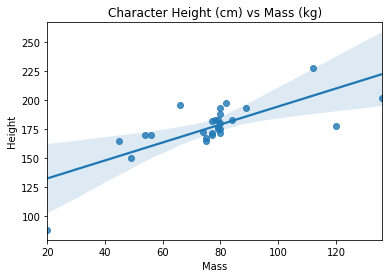

In [45]:
# Graph



graph = sns.regplot(
    data = characters_train,
    x = "Mass",
    y = "Height",
    
    
)

graph.set_title("Character Height (cm) vs Mass (kg)")

In [46]:
characters_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Mass   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     13.17
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           3.26e-05
Time:                        14:00:31   Log-Likelihood:                -108.19
No. Observations:                  27   AIC:                             224.4
Df Residuals:                      23   BIC:                             229.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -50.0961     21.816     -2.296      0.031     -95.226      -4.966
Gender[T.Male]    15.9253      7.472      2.131      0.044       0.468      31.382
Gender[T.None]    17.2629     15.798      1.093      0.286     -15.419      49.944
Height             0.6457      0.127      5.081      0.000       0.383       0.909
==============================================================================
Omnibus:                       19.591   Durbin-Watson:                   2.341
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.380
Skew:                           1.661   Prob(JB):                     1.87e-06
Kurtosis:                       6.523   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""